In [66]:
import itertools
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
file_path = "../../data/marketing.csv"
data_raw = pd.read_csv(file_path)

In [68]:
data_raw

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


In [69]:
###  extracting the needed field
columns = ['user_id', 'date_served', 'marketing_channel', 'converted']
data = data_raw[columns].copy()

### dropping null values
data.dropna(axis=0, inplace=True)

### relabel conversion to 1/0
data['converted'] = data['converted'].astype('int') 
### converting date_served into date format
data['date_served'] = pd.to_datetime(data['date_served'], format='%m/%d/%y', errors='coerce')

In [70]:
data

,user_id,date_served,marketing_channel,converted
0,a100000029,2018-01-01,House Ads,1
1,a100000030,2018-01-01,House Ads,1
2,a100000031,2018-01-01,House Ads,1
3,a100000032,2018-01-01,House Ads,1
4,a100000033,2018-01-01,House Ads,1
...,...,...,...,...
10032,a100007290,2018-01-17,Email,1
10033,a100007291,2018-01-17,Email,1
10034,a100007292,2018-01-05,Instagram,0
10035,a100007293,2018-01-17,Email,1


In [71]:
data_lvl1 = data[["user_id", "marketing_channel", "converted"]].sort_values(by = ["user_id", "marketing_channel"])
data_lvl1

,user_id,marketing_channel,converted
2380,a100000001,Facebook,0
2381,a100000002,Instagram,0
2382,a100000003,Instagram,0
1815,a100000004,House Ads,0
2383,a100000005,Facebook,0
...,...,...,...
10032,a100007290,Email,1
10033,a100007291,Email,1
10034,a100007292,Instagram,0
10035,a100007293,Email,1


In [72]:
data_lvl2 = data_lvl1.groupby(["user_id"], as_index = False).agg({"marketing_channel": lambda x: ",".join(map(str, x.unique())), "converted": max})
data_lvl2.rename(columns = {"marketing_channel": "marketing_channel_subset"}, inplace = True)

In [73]:
data_lvl2[data_lvl2["converted"] == 0].shape, data_lvl2[data_lvl2["converted"] == 1].shape

((6279, 3), (1015, 3))

In [74]:
data_lvl2.sample(10)

,user_id,marketing_channel_subset,converted
2242,a100002243,"House Ads,Push",0
2655,a100002656,Facebook,0
5127,a100005128,House Ads,0
4646,a100004647,House Ads,0
6732,a100006733,House Ads,0
2808,a100002809,House Ads,0
6903,a100006904,Push,0
3695,a100003696,House Ads,0
1042,a100001043,"House Ads,Instagram,Push",0
3146,a100003147,House Ads,0


In [75]:
data_lvl3 = data_lvl2.groupby(["marketing_channel_subset"], as_index = False).agg(sum)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_60084\2562478285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_lvl3 = data_lvl2.groupby(["marketing_channel_subset"], as_index = False).agg(sum)


In [76]:
data_lvl3

,marketing_channel_subset,converted
0,Email,110
1,"Email,Facebook",11
2,"Email,Facebook,House Ads",8
3,"Email,Facebook,House Ads,Instagram",0
4,"Email,House Ads",40
5,"Email,House Ads,Instagram",3
6,"Email,House Ads,Push",1
7,"Email,Instagram",10
8,"Email,Push",4
9,Facebook,103


In [77]:
### return all possible combination of the channel
# 即生成列表List的所有组合
# 如List = [1,2,3]，则返回[], [1], [2], [3], [1,2], [1,3], [2,3], [1,2,3]
def power_set(List):
    PS = [list(j) for i in range(len(List)) for j in itertools.combinations(List, i+1)]
    return PS

In [78]:
#demo
my_list = [1, 2, 3]
power_set(my_list)

[[1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]

In [79]:
def subsets(s):
    if len(s) == 1:
        return s
    else:
        sub_channels = []
        for i in range(1, len(s) + 1):
            sub_channels.extend(map(list, itertools.combinations(s, i)))
    return list(map(",".join, map(sorted, sub_channels)))

In [80]:
# demo
subsets(["1", "2", "3", "4"])

['1',
 '2',
 '3',
 '4',
 '1,2',
 '1,3',
 '1,4',
 '2,3',
 '2,4',
 '3,4',
 '1,2,3',
 '1,2,4',
 '1,3,4',
 '2,3,4',
 '1,2,3,4']

In [81]:
def v_function(A, C_values):
    subsets_of_A = subsets(A)
    worth_of_A = 0
    for subset in subsets_of_A:
        if subset in C_values:
            worth_of_A += C_values[subset] # 用多个渠道转化对应的次数表示合作博弈中这些渠道的合作价值
    return worth_of_A

In [82]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [83]:
# demo
data_lvl3_test = data_lvl3.copy()
data_lvl3_test['channels'] = data_lvl3_test['marketing_channel_subset'].apply(lambda x: x if len(x.split(",")) == 1 else np.nan)
data_lvl3_test

,marketing_channel_subset,converted,channels
0,Email,110,Email
1,"Email,Facebook",11,NaN
2,"Email,Facebook,House Ads",8,NaN
3,"Email,Facebook,House Ads,Instagram",0,NaN
4,"Email,House Ads",40,NaN
5,"Email,House Ads,Instagram",3,NaN
6,"Email,House Ads,Push",1,NaN
7,"Email,Instagram",10,NaN
8,"Email,Push",4,NaN
9,Facebook,103,Facebook


In [84]:
def calculate_shapley(df, channel_name, conv_name):
    '''
    This function returns the shapley values
            - df: A dataframe with the two columns: ['channel_name', 'conv_name'].
            The channel_subset column is the channel(s) associated with the conversion and the 
            count is the sum of the conversions. 
            - channel_name: A string that is the name of the channel column 
            - conv_name: A string that is the name of the column with conversions
            **Make sure that that each value in channel_subset is in alphabetical order. 
            Email,PPC and PPC,Email are the same in regards to this analysis and 
            should be combined under Email,PPC.            
    '''
    
    c_values = df.set_index(channel_name).to_dict()[conv_name]    
    df['channels'] = df[channel_name].apply(lambda x: x if len(x.split(",")) == 1 else np.nan)  # hoho: 这里可能会遗漏一些channel
    channels = list(df['channels'].dropna().unique())
    
#     print(f"power_set: {power_set(channels)}")
    
    v_values = {}
    for A in power_set(channels):
        v_values[','.join(sorted(A))] = v_function(A, c_values)
    n = len(channels)
    shapley_values = defaultdict(int)
    
    for channel in channels:
        for A in v_values.keys():
            if channel not in A.split(","):
                cardinal_A = len(A.split(","))  # 没有channel的长度
                A_with_channel = A.split(",")
                A_with_channel.append(channel)
                A_with_channel = ",".join(sorted(A_with_channel))
                weight = (factorial(cardinal_A) * factorial(n - cardinal_A - 1) / factorial(n)) # Weight = |S|!(n-|S|-1)!/n!
                contrib = (v_values[A_with_channel] - v_values[A]) # Marginal contribution = v(S U {i})-v(S)
                shapley_values[channel] += weight * contrib
                
        # Add the term corresponding to the empty set
        shapley_values[channel]+= v_values[channel] / n 
        
    return shapley_values

In [85]:
shapley_dict = calculate_shapley(data_lvl3, 'marketing_channel_subset', 'converted')

In [86]:
shapley_dict

defaultdict(int,
            {'Email': 146.5,
             'Facebook': 198.50000000000003,
             'House Ads': 427.83333333333337,
             'Instagram': 168.00000000000003,
             'Push': 74.16666666666667})

In [87]:
shapley_result = pd.DataFrame(list(shapley_dict.items()), columns=['channel', 'shapley_value'])

In [88]:
shapley_result

,channel,shapley_value
0,Email,146.500000
1,Facebook,198.500000
2,House Ads,427.833333
3,Instagram,168.000000
4,Push,74.166667


channel          Email
shapley_value    146.5
Name: 0, dtype: object
channel          Facebook
shapley_value       198.5
Name: 1, dtype: object
channel           House Ads
shapley_value    427.833333
Name: 2, dtype: object
channel          Instagram
shapley_value        168.0
Name: 3, dtype: object
channel               Push
shapley_value    74.166667
Name: 4, dtype: object


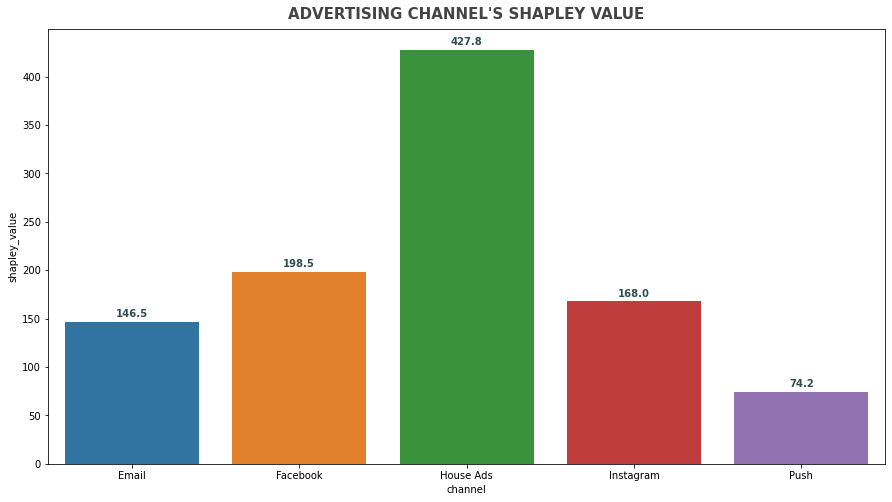

In [89]:
plt.subplots(figsize = (15, 8))
s = sns.barplot(x = 'channel', y = 'shapley_value', data = shapley_result)

for idx, row in shapley_result.iterrows():
    print(f"{row}")
    s.text(row.name, row.shapley_value + 5, round(row.shapley_value,1), ha='center', color='darkslategray', fontweight='semibold')
plt.title("ADVERTISING CHANNEL'S SHAPLEY VALUE", 
          fontdict={'fontfamily': 'san-serif', 'fontsize': 15, 'fontweight': 'semibold', 'color':'#444444'}, 
          loc='center', 
          pad=10)
plt.show()